# Underfitting vs. Overfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import  metrics

Rozważmy następujący zbiór punktów:

In [2]:
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

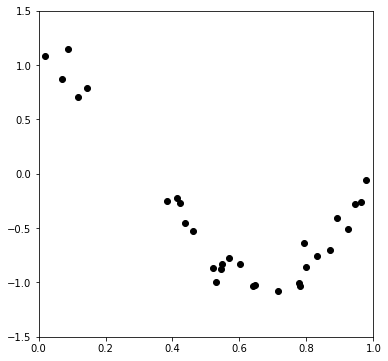

In [3]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X, y,  color='black')
x_tr = np.linspace(0, 1, 200)
plt.show()

Podziel dane na dwie grupy.

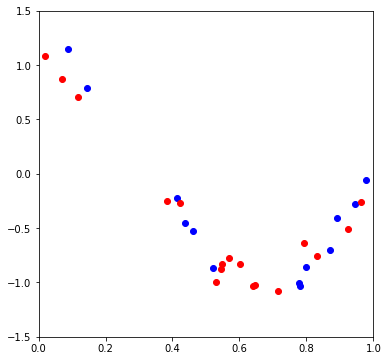

In [4]:
s=np.random.random_sample(n_samples)
s[s>0.5]=1
s[s<=0.5]=0
s
X1=X[s==1]
y1=y[s==1]
X2=X[s==0]
y2=y[s==0]

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj regresję:

* liniową
* wielomianową stopnia 20

w każdej z grup.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import  metrics
import sklearn.linear_model as lm

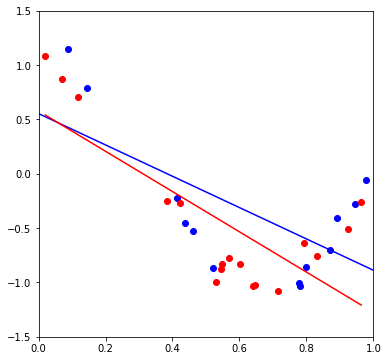

In [9]:
X1=np.vstack(X1)
X2=np.vstack(X2)

model1=lm.LinearRegression()
model1.fit(X1, y1)
f_model=lambda x: model1.coef_ *x + model1.intercept_
x_f_model1=np.linspace(0.,1,200)
y_f_model1=f_model(x_f_model1)

model2=lm.LinearRegression()
model2.fit(X2, y2)

plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.plot(x_f_model1,y_f_model1,'b')
plt.scatter(X2, y2,  color='red')
plt.plot(X2,model2.predict(X2),'r')
x_tr = np.linspace(0, 1, 200)
plt.show()



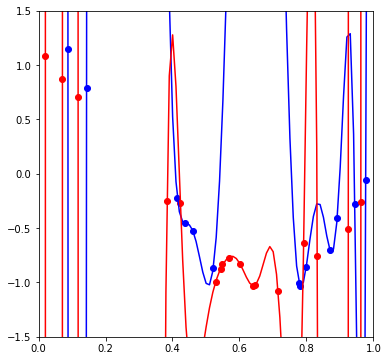

In [10]:
model3 = make_pipeline(PolynomialFeatures(20), lm.LinearRegression())
model3.fit(X1, y1)

model4 = make_pipeline(PolynomialFeatures(20), lm.LinearRegression())
model4.fit(X2, y2)

x_tr=np.linspace(0,10,1000)
x_tr=np.vstack(x_tr)

plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.plot(x_tr, model3.predict(x_tr),'b')
plt.scatter(X2, y2,  color='red')
plt.plot(x_tr, model4.predict(x_tr),'r')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj 100 podziałów na dwie równe części. Za każdym razem naucz regresję:

* liniową
* wielomianową stopnia 1, 2, 3, 4, 5, 6

na jednym fragmęcie i policz R_square na drugim.
Zwizualizuj wynik.


In [14]:
R_degree = {
    1: [],
    2: [],
    3: [],
    4: [],
    5: [],
    6: [],
}

for i in range(100):
  s = np.random.random_sample(n_samples)
  s[s>0.5] = 1
  s[s<=0.5] = 0
  s
  X1=X[s==1]
  y1=y[s==1]
  X2=X[s==0]
  y2=y[s==0]

  X1=np.vstack(X1)
  X2=np.vstack(X2)
  for degree in range(1, 7):
    model = make_pipeline(PolynomialFeatures(degree), lm.LinearRegression())
    model.fit(X1,y1)
    R_degree[degree].append(metrics.explained_variance_score(y2, model.predict(X2)))

for degree in range(1, 7):
  print("degree:", degree)
  print(np.mean(R_degree[degree]))
  print(np.std(R_degree[degree]))

degree: 1
0.30794377100735065
0.40353603399041754
degree: 2
0.8631870190037338
0.18500875263202796
degree: 3
0.8540046827513738
0.5144984895931847
degree: 4
-18.528121893429855
187.04933937894236
degree: 5
-1319.1324149133209
13057.366041748948
degree: 6
-588.6212508052511
4307.821889208074
